<a href="https://colab.research.google.com/github/Erica2222/Erica2222/blob/main/Final_Urban_Air_Pollution_Manila.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Urban_Air_Pollution

In [12]:
import os
import zipfile
import pandas as pd


In [13]:
zip_path = '/content/archive.zip'
extract_folder = '/content/extracted_files/'

if not os.path.exists(extract_folder):
    os.makedirs(extract_folder)

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_folder)

print("ZIP file extracted successfully!")


ZIP file extracted successfully!


In [14]:
csv_files = []

for root, dirs, files in os.walk(extract_folder):
    for file in files:
        if file.endswith('.csv'):
            csv_files.append(os.path.join(root, file))

print(f"Found {len(csv_files)} CSV files.")


Found 8 CSV files.


In [15]:
df_list = []

for file_path in csv_files:
    df = pd.read_csv(file_path)
    df_list.append(df)

if df_list:
    df_full = pd.concat(df_list, ignore_index=True)
else:
    raise Exception("No CSV files found to load!")

print(f"Total records loaded: {len(df_full)}")


Total records loaded: 292856


In [16]:
print("Columns in dataset:", df_full.columns.tolist())


Columns in dataset: ['city_name', 'coord.lon', 'coord.lat', 'datetime', 'main.aqi', 'components.co', 'components.no', 'components.no2', 'components.o3', 'components.so2', 'components.pm2_5', 'components.pm10', 'components.nh3']


In [17]:
output_path_full = '/content/processed_air_quality_full.csv'
df_full.to_csv(output_path_full, index=False)
print(f"Full dataset saved at {output_path_full}")


Full dataset saved at /content/processed_air_quality_full.csv


In [18]:
df_full.head()


,city_name,coord.lon,coord.lat,datetime,main.aqi,components.co,components.no,components.no2,components.o3,components.so2,components.pm2_5,components.pm10,components.nh3
0,Alaminos,119.9811,16.1561,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Angeles City,120.5833,15.1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Antipolo,121.1900,15.6181,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Bacolod,123.5085,12.2285,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Bacoor,120.9290,14.4590,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
metro_manila_cities = [
    'Manila', 'Quezon City', 'Pasig', 'Taguig', 'Makati', 'Mandaluyong',
    'Pasay', 'Parañaque', 'Muntinlupa', 'Las Piñas', 'Caloocan', 'Malabon',
    'Navotas', 'Valenzuela', 'Marikina', 'San Juan', 'Pateros'
]

df_metro_manila = df_full[df_full['city_name'].isin(metro_manila_cities)].copy()

print(df_metro_manila.info())

print(df_metro_manila.head())

print(df_metro_manila.describe())


print(f"Filtered Metro Manila data: {len(df_metro_manila)} rows")
df_metro_manila.head()


<class 'pandas.core.frame.DataFrame'>
Index: 19098 entries, 71 to 292852
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   city_name         19098 non-null  object 
 1   coord.lon         36 non-null     float64
 2   coord.lat         36 non-null     float64
 3   datetime          19062 non-null  object 
 4   main.aqi          19062 non-null  float64
 5   components.co     19062 non-null  float64
 6   components.no     19062 non-null  float64
 7   components.no2    19062 non-null  float64
 8   components.o3     19062 non-null  float64
 9   components.so2    19062 non-null  float64
 10  components.pm2_5  19062 non-null  float64
 11  components.pm10   19062 non-null  float64
 12  components.nh3    19062 non-null  float64
dtypes: float64(11), object(2)
memory usage: 2.0+ MB
None
    city_name  coord.lon  coord.lat datetime  main.aqi  components.co  \
71  Las Piñas   120.9828    14.4506      NaN       NaN    

,city_name,coord.lon,coord.lat,datetime,main.aqi,components.co,components.no,components.no2,components.o3,components.so2,components.pm2_5,components.pm10,components.nh3
71,Las Piñas,120.9828,14.4506,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
79,Malabon,119.9379,15.6361,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
84,Manila,120.9822,14.6042,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
90,Navotas,120.9500,14.6667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99,Pasig,121.0650,14.5870,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<ipython-input-20-e3885f619806>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_metro_manila['components.pm2_5'] = df_metro_manila['components.pm2_5'].interpolate(method='linear')
<ipython-input-20-e3885f619806>:6: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_metro_manila['components.pm2_5'] = df_metro_manila['components.pm2_5'].fillna(method='bfill')
<ipython-input-20-e3885f619806>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-v

Finished filling missing PM2.5 values.


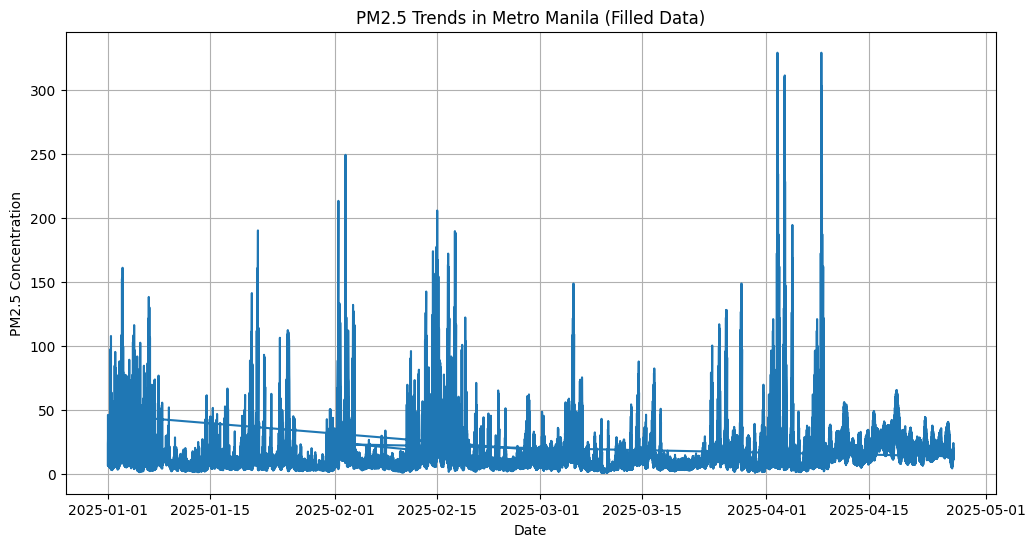

In [20]:
df_metro_manila['datetime'] = pd.to_datetime(df_metro_manila['datetime'], errors='coerce')

df_metro_manila = df_metro_manila.dropna(subset=['datetime'])

df_metro_manila['components.pm2_5'] = df_metro_manila['components.pm2_5'].interpolate(method='linear')
df_metro_manila['components.pm2_5'] = df_metro_manila['components.pm2_5'].fillna(method='bfill')
df_metro_manila['components.pm2_5'] = df_metro_manila['components.pm2_5'].fillna(method='ffill')

print("Finished filling missing PM2.5 values.")

import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(df_metro_manila['datetime'], df_metro_manila['components.pm2_5'])
plt.xlabel('Date')
plt.ylabel('PM2.5 Concentration')
plt.title('PM2.5 Trends in Metro Manila (Filled Data)')
plt.grid()
plt.show()


In [21]:
import numpy as np
n_steps = 24  # last 24 hours to predict the next hour
pollutant_column = 'components.pm2_5'

def create_sequences(data, n_steps):
    X, y = [], []
    for i in range(n_steps, len(data)):
        X.append(data[i-n_steps:i])
        y.append(data[i])
    return np.array(X), np.array(y)

pollutant_values = df_metro_manila[pollutant_column].values
X, y = create_sequences(pollutant_values, n_steps)

print(f"Created sequences: X shape = {X.shape}, y shape = {y.shape}")

X = X.reshape((X.shape[0], X.shape[1], 1, 1, 1))
print(f"Reshaped X for ConvLSTM: {X.shape}")


Created sequences: X shape = (19038, 24), y shape = (19038,)
Reshaped X for ConvLSTM: (19038, 24, 1, 1, 1)


In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import ConvLSTM2D, Dense, Flatten
from tensorflow.keras.callbacks import EarlyStopping

#Split into train and test sets
split_idx = int(len(X) * 0.8)
X_train, X_test = X[:split_idx], X[split_idx:]
y_train, y_test = y[:split_idx], y[split_idx:]

print(f"Training samples: {X_train.shape}, Testing samples: {X_test.shape}")

model = Sequential([
    ConvLSTM2D(filters=64, kernel_size=(1,1), activation='relu', input_shape=(X_train.shape[1], 1, 1, 1)),
    Flatten(),
    Dense(50, activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.summary()

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=50,
    batch_size=32,
    callbacks=[early_stopping]
)


Training samples: (15230, 24, 1, 1, 1), Testing samples: (3808, 24, 1, 1, 1)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv_lstm2d (ConvLSTM2D)        │ (None, 1, 1, 64)       │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 50)             │         3,250 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,197 (78.89 KB)

 Trainable params: 20,197 (78.89 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
476/476 ━━━━━━━━━━━━━━━━━━━━ 13s 22ms/step - loss: 437.6377 - val_loss: 122.0529
Epoch 2/50
476/476 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step - loss: 363.3448 - val_loss: 117.3154
Epoch 3/50
476/476 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - loss: 333.9337 - val_loss: 132.1632
Epoch 4/50
476/476 ━━━━━━━━━━━━━━━━━━━━ 12s 21ms/step - loss: 311.8904 - val_loss: 128.2434
Epoch 5/50
476/476 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - loss: 322.4835 - val_loss: 110.5940
Epoch 6/50
476/476 ━━━━━━━━━━━━━━━━━━━━ 11s 22ms/step - loss: 320.1708 - val_loss: 158.5030
Epoch 7/50
476/476 ━━━━━━━━━━━━━━━━━━━━ 20s 20ms/step - loss: 354.6589 - val_loss: 103.0377
Epoch 8/50
476/476 ━━━━━━━━━━━━━━━━━━━━ 11s 22ms/step - loss: 273.5134 - val_loss: 113.1763
Epoch 9/50
476/476 ━━━━━━━━━━━━━━━━━━━━ 23s 28ms/step - loss: 360.8077 - val_loss: 102.9633
Epoch 10/50
476/476 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - loss: 297.4365 - val_loss: 107.7677
Epoch 11/50
476/476 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - loss: 296.4172 - val_lo

119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


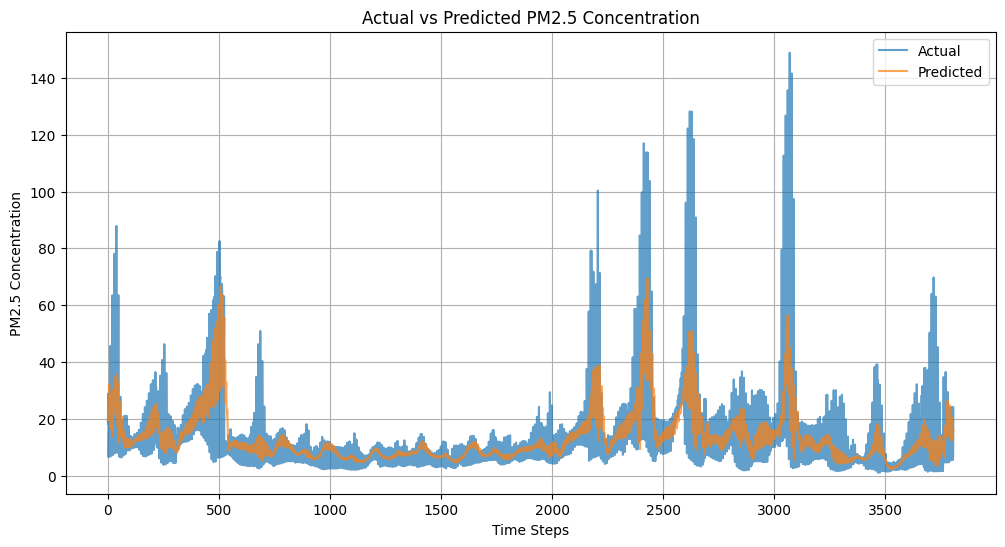

In [23]:
import matplotlib.pyplot as plt

# Predict on test set
y_pred = model.predict(X_test).flatten()

# Plot actual vs predicted
plt.figure(figsize=(12,6))
plt.plot(y_test, label='Actual', alpha=0.7)
plt.plot(y_pred, label='Predicted', alpha=0.7)
plt.title('Actual vs Predicted PM2.5 Concentration')
plt.xlabel('Time Steps')
plt.ylabel('PM2.5 Concentration')
plt.legend()
plt.grid(True)
plt.show()


In [24]:
model.save('urban_air_pollution_convlstm.h5')
print("Model saved successfully!")


Model saved successfully!


In [25]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Compute MSE and RMSE
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Test RMSE: {rmse:.2f} ug/m³")


Test RMSE: 10.15 ug/m³


In [26]:
from sklearn.metrics import r2_score

# Compute R² score
r2 = r2_score(y_test, y_pred)

print(f"R² Score: {r2:.4f}")


R² Score: 0.4410
